In [128]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и изучение данных

In [129]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()

In [130]:
print("Ключи wine_dataset: \n{}".format(wine_dataset.keys()))

Ключи wine_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [168]:
wine_dataset = load_wine()
print(wine_dataset['DESCR'][:1600] + "\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [132]:
print("Названия ответов: {}".format(wine_dataset['target_names']))

Названия ответов: ['class_0' 'class_1' 'class_2']


In [133]:
print("Названия признаков: \n{}".format(wine_dataset['feature_names']))

Названия признаков: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [134]:
print("Тип массива data: {}".format(type(wine_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [135]:
print("Форма массива data: {}".format(wine_dataset['data'].shape))

Форма массива data: (178, 13)


In [136]:
print("Первые пять (178) строк массива data:\n{}".format(wine_dataset['data'][:178]))

Первые пять (178) строк массива data:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [137]:
print("Тип массива target: {}".format(type(wine_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [138]:
print("Форма массива target: {}".format(wine_dataset['target'].shape))

Форма массива target: (178,)


In [139]:
print("Ответы:\n{}".format(wine_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Метрики эффективности: обучающий и тестовые наборы

In [140]:
X_train, X_test, y_train, y_test = train_test_split (wine_dataset['data'], wine_dataset['target'],random_state=0)

In [141]:
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива x_train: (133, 13)
форма массива y_train: (133,)


In [142]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (45, 13)
форма массива y_test: (45,)


## Исследование данных. Визуализация

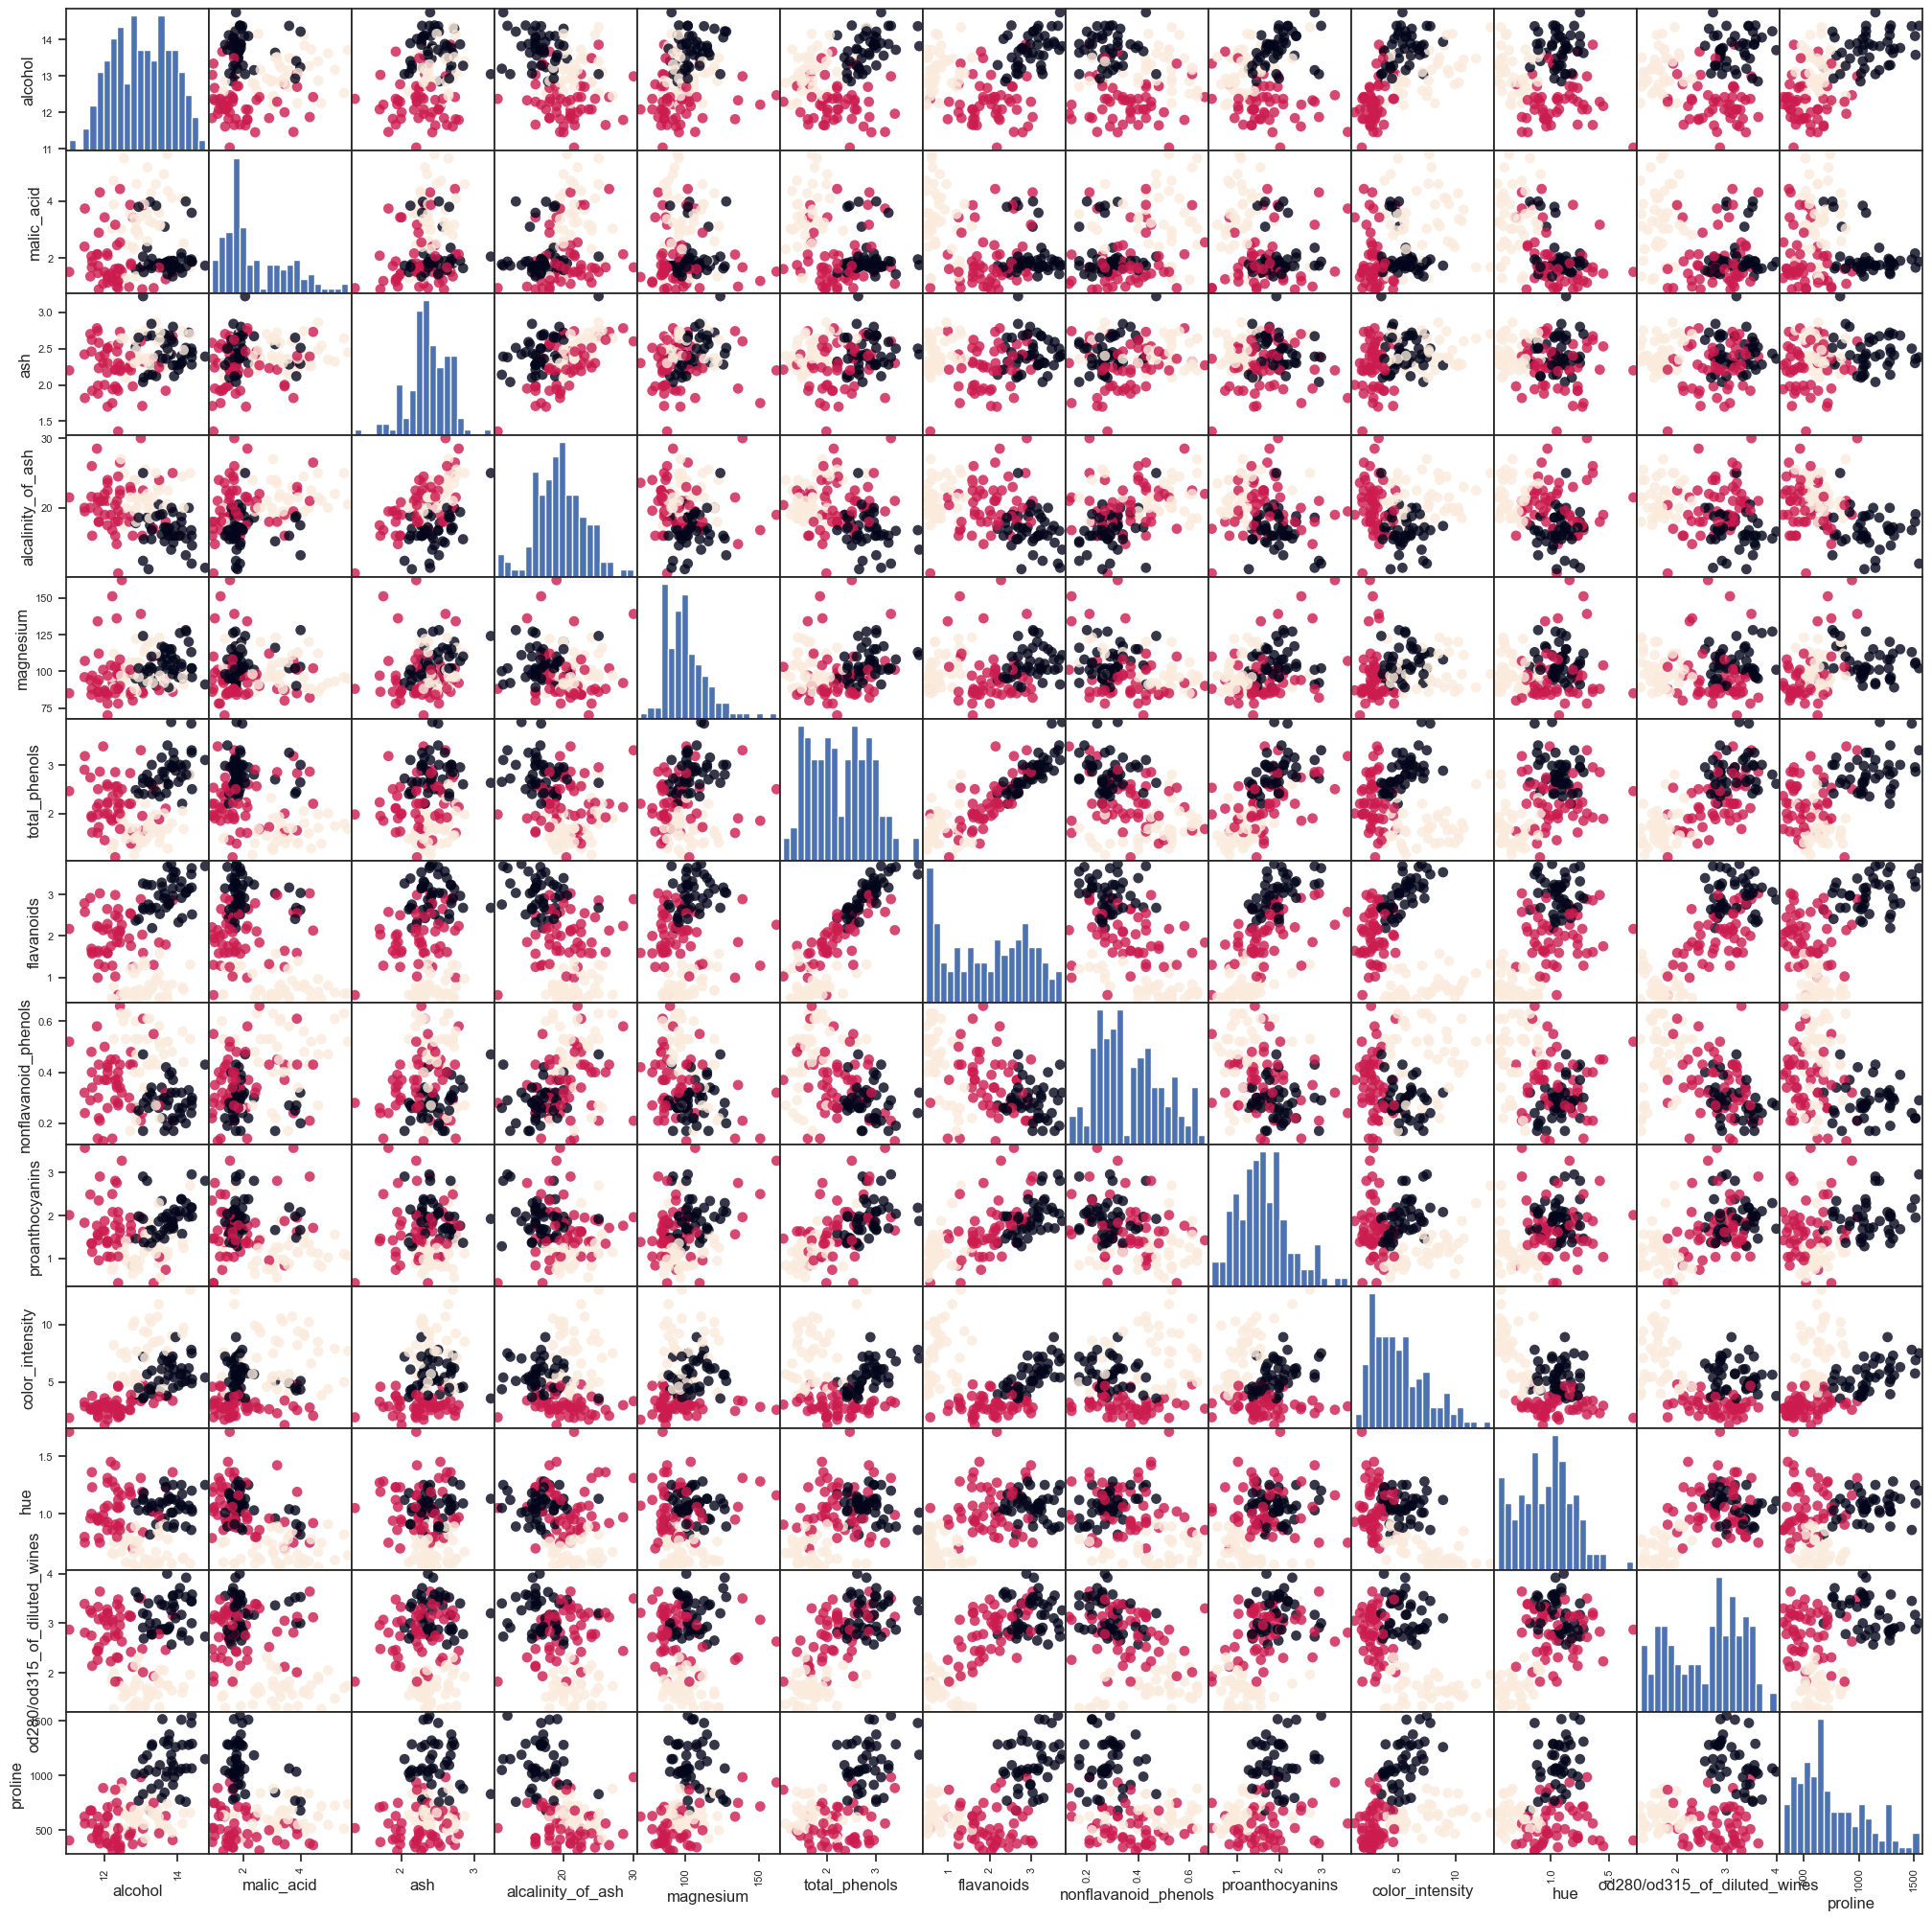

In [143]:
wine_dataset = pd.DataFrame(X_train, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(wine_dataset, c=y_train, figsize=(25,25), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

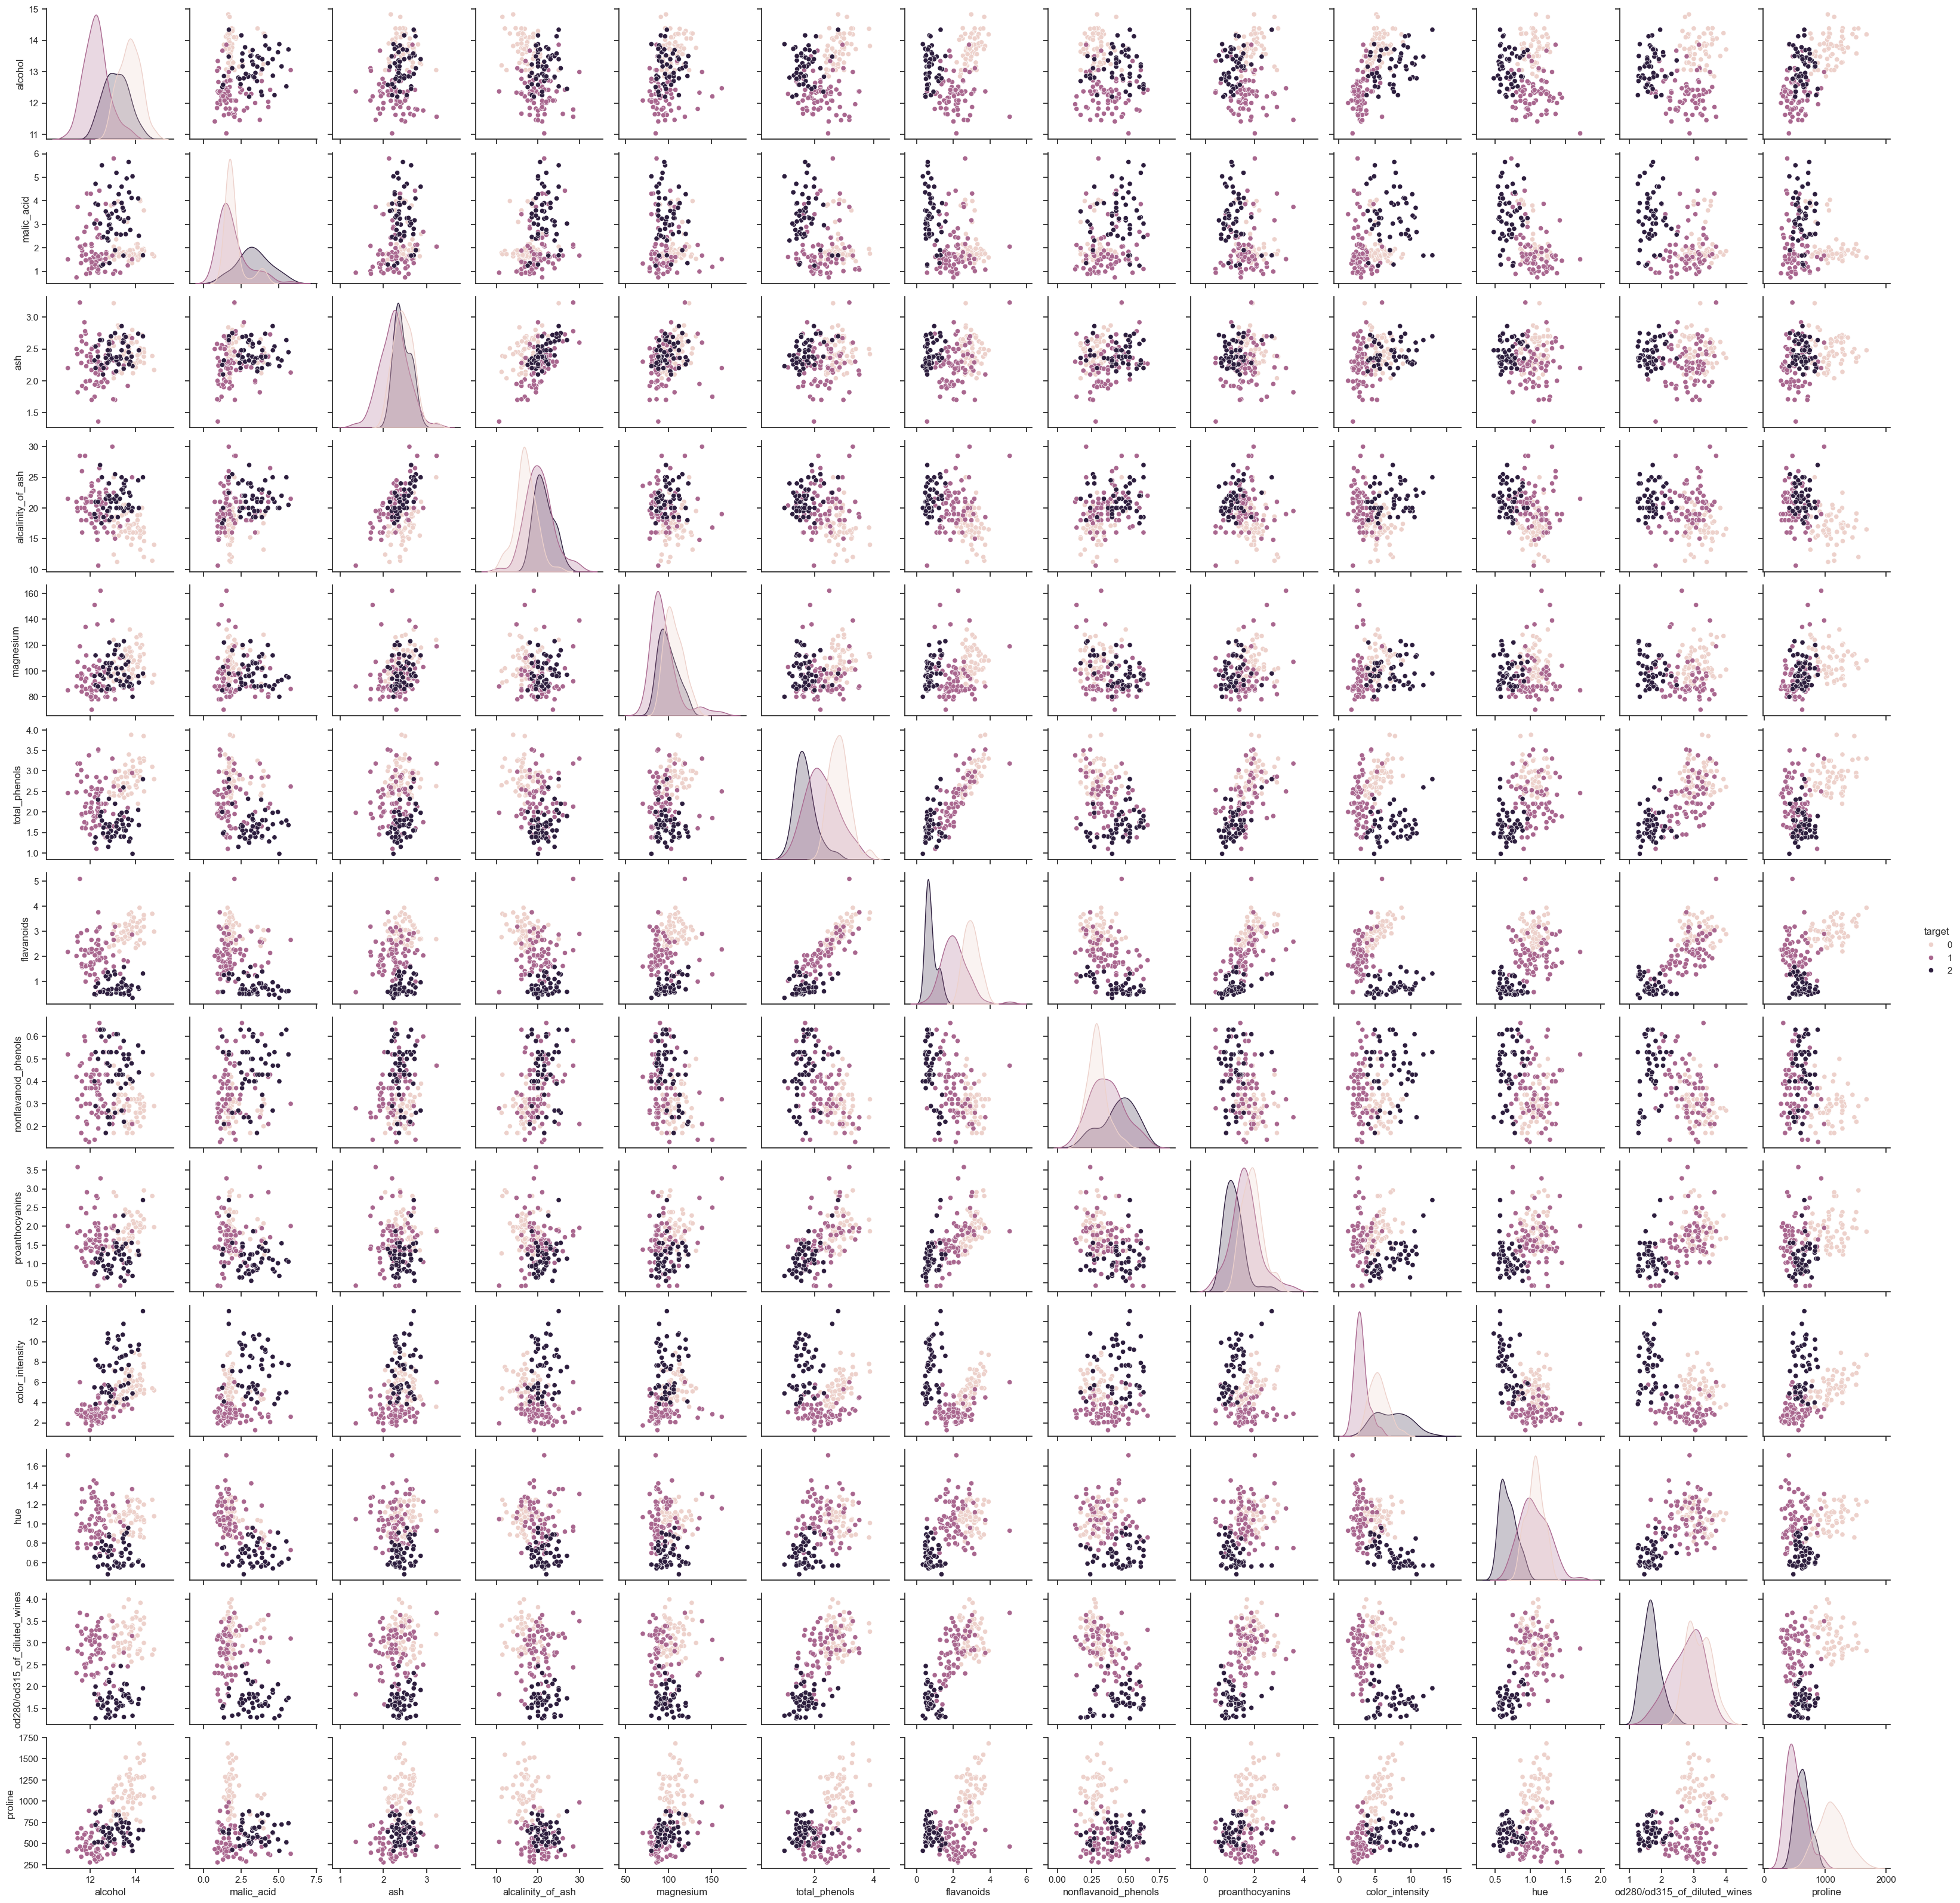

In [144]:
wine = load_wine()
data = wine.data
wine_df = pd.DataFrame(data, columns=wine.feature_names)
wine_df['target'] = wine.target

sns.set(style="ticks")
sns.pairplot(wine_df, hue="target")
plt.show()

## Построение модели методом k-ближайших средних

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Получение прогнозов

In [161]:
import numpy as np

X_new = np.array([[42, 17.03, 25, 20.66, 80.50, 100.02, 37, 56.46, 10.33, 45.5, 7.81, 2.32, 210]])
print("Форма массива X_new: {}".format(X_new.shape))    

Форма массива X_new: (1, 13)


In [162]:
prediction = knn.predict(X_new)
predicted_label = wine.target_names[prediction]
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(predicted_label))

Прогноз: [1]
Спрогнозированная метка: ['class_1']


## Оценка качества модели

In [163]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [165]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.76


## Вывод
1. Загрузили датасет "load_wine" из библиотеки scikit-learn.

2. Осуществили изучение данных, выводя информацию о датасете, такую как ключи, описание, названия признаков и т. д.

3. Поделили данные на обучающий и тестовый наборы, используя функцию train_test_split, для последующего обучения и оценки модели.

4. Провели исследование данных с помощью визуализации. Построили матрицу диаграмм рассеяния для анализа взаимосвязей между признаками и их влияния на классификацию.

5. Создали модель k-ближайших соседей (KNeighborsClassifier) с количеством соседей равным 1 и обучает её на обучающем наборе данных.

6. Получили прогноз для новых данных (пример данных X_new).

7. Оценили качество модели, делая прогнозы для тестового набора данных и вычисляя правильность (accuracy) модели на тестовом наборе.

Вывод:

Изучение данных позволило получить представление о датасете "load_wine" и его характеристиках. Построение матрицы диаграмм рассеяния и парных диаграмм рассеяния помогли визуализировать взаимосвязи между признаками и классами вин.

Модель k-ближайших соседей была обучена на обучающем наборе данных и успешно применена для прогнозирования класса для новых данных. Однако, для получения более надежных выводов, модель должна быть оценена на тестовом наборе. В данном случае, правильность модели на тестовом наборе составляет 0.76, что означает, что модель верно классифицировала 76% объектов тестовой выборки.

Полученные результаты говорят о потенциале использования метода k-ближайших соседей для классификации вин в данном датасете, но возможно также потребуется дополнительное исследование и оптимизация параметров модели для улучшения её производительности.